In [43]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download the words corpus
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [44]:
#loading the dataset
df=pd.read_csv(r'tweets-engagement-metrics.csv')

In [45]:
df.head()

,Unnamed: 0,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,0,tw-1267804344,Unknown,1.0,Elbasan,Elbasan,AL,Albania,tw-698155297102295041,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,1,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-685159757209059329,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,Now Open AWS Asia Pacific (Seoul) Region via ...
2,2,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686907710311378944,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,A Beginner's Guide to Scaling to 11 Million+ U...
3,3,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-686968158050201600,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,Bridging AWS and Azure environments via VPN vi...
4,4,tw-27229880,Male,2.0,Tirana,Tirane,AL,Albania,tw-690210449674092545,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,ELK on AWS ElasticSearch Service + ElasticBean...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102062 entries, 0 to 102061
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    102062 non-null  int64  
 1   UserID        102062 non-null  object 
 2   Gender        102062 non-null  object 
 3   LocationID    102062 non-null  float64
 4   City          99783 non-null   object 
 5   State         100165 non-null  object 
 6   StateCode     100336 non-null  object 
 7   Country       102062 non-null  object 
 8   TweetID       102062 non-null  object 
 9   Hour          102062 non-null  int64  
 10  Day           102062 non-null  int64  
 11  Weekday       102062 non-null  object 
 12  IsReshare     102062 non-null  bool   
 13  Reach         102062 non-null  float64
 14  RetweetCount  102062 non-null  float64
 15  Likes         102062 non-null  float64
 16  Klout         102062 non-null  float64
 17  Sentiment     102062 non-null  float64
 18  Lang

In [47]:
df.describe(include='all')

,Unnamed: 0,UserID,Gender,LocationID,City,State,StateCode,Country,TweetID,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
count,102062.000000,102062,102062,102062.000000,99783,100165,100336,102062,102062,102062.000000,102062.000000,102062,102062,1.020620e+05,102062.000000,102062.000000,102062.000000,102062.000000,102062,102062
unique,NaN,33212,4,NaN,3801,1008,357,151,99999,NaN,NaN,7,2,NaN,NaN,NaN,NaN,NaN,36,70267
top,NaN,tw-66780587,Male,NaN,Seattle,California,US-CA,United States,tw-703486262863372288,NaN,NaN,Tuesday,False,NaN,NaN,NaN,NaN,NaN,en,Zombiler uyandnda Amazon Web Services hazr ola...
freq,NaN,845,52603,NaN,7298,11734,11734,51457,3,NaN,NaN,18826,65852,NaN,NaN,NaN,NaN,NaN,93564,484
mean,51030.500000,NaN,NaN,2836.207687,NaN,NaN,NaN,NaN,NaN,11.416149,15.898709,NaN,NaN,8.426389e+03,7.986449,0.149684,40.409986,0.380754,NaN,NaN
std,29462.905924,NaN,NaN,1330.294460,NaN,NaN,NaN,NaN,NaN,6.062294,8.401409,NaN,NaN,8.777762e+04,96.914644,2.557491,13.652028,1.046501,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,-6.000000,NaN,NaN
25%,25515.250000,NaN,NaN,1601.000000,NaN,NaN,NaN,NaN,NaN,7.000000,9.000000,NaN,NaN,1.520000e+02,0.000000,0.000000,32.000000,0.000000,NaN,NaN
50%,51030.500000,NaN,NaN,3738.000000,NaN,NaN,NaN,NaN,NaN,11.000000,16.000000,NaN,NaN,4.540000e+02,0.000000,0.000000,43.000000,0.000000,NaN,NaN
75%,76545.750000,NaN,NaN,3774.000000,NaN,NaN,NaN,NaN,NaN,16.000000,23.000000,NaN,NaN,1.519000e+03,3.000000,0.000000,49.000000,0.600000,NaN,NaN


## Checking Missing Values

In [48]:
df.isnull().sum()

Unnamed: 0         0
UserID             0
Gender             0
LocationID         0
City            2279
State           1897
StateCode       1726
Country            0
TweetID            0
Hour               0
Day                0
Weekday            0
IsReshare          0
Reach              0
RetweetCount       0
Likes              0
Klout              0
Sentiment          0
Lang               0
text               0
dtype: int64

#### We notice that some rows contain empty values for specific columns. To streamline the dataset, we will remove the `City`, `State`, and `StateCode` columns since the `Country` column already provides sufficient geographical information.

In [49]:
df.drop(['City','State','StateCode'],axis=1,inplace=True)

#### We also dropping the column 'Unnamed: 0' as it just represent the index.

In [50]:
# dropping 'Unnamed:0' column
df.drop('Unnamed: 0',axis=1,inplace=True)

## Checking Duplicates

In [51]:
# Count the number of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicate_rows)

Number of Duplicate Rows: 0


#### No duplicates can be found in the datasets.

#### We are also dropping the columns which we are not going to use into our analysis. For example, `UserID`, `LocationID`, `TweetID`.

In [52]:
df.drop(['UserID','LocationID','TweetID'],inplace=True,axis=1)

In [53]:
def unique_values_counts(df): #defining a function
    unique_data={} #created a empty dictionary
    for column in df.columns:
        unique_values=df[column].unique()
        unique_count=df[column].nunique()
        unique_data[column]={'Unique Counts': unique_count,'Unique Values': unique_values}
    return unique_data

unique_data=unique_values_counts(df)
unique_data

{'Gender': {'Unique Counts': 4,
  'Unique Values': array(['Unknown', 'Male', 'Female', 'Unisex'], dtype=object)},
 'Country': {'Unique Counts': 151,
  'Unique Values': array(['Albania', 'Algeria', 'Angola', 'Anguilla', 'Argentina', 'Armenia',
         'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belarus',
         'Belgium', 'Benin', 'Bolivia', 'Bolivia (Plurinational State of)',
         'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
         'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
         'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
         'Congo', 'Costa Rica', 'Croatia', "Cte d'Ivoire", 'Cuba', 'Cyprus',
         'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
         'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
         'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
         'Greenland', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
         'Hong Kong', '

In [54]:
df.columns

Index(['Gender', 'Country', 'Hour', 'Day', 'Weekday', 'IsReshare', 'Reach',
       'RetweetCount', 'Likes', 'Klout', 'Sentiment', 'Lang', 'text'],
      dtype='object')

In [55]:
df.head()

,Gender,Country,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text
0,Unknown,Albania,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi..."
1,Male,Albania,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,Now Open AWS Asia Pacific (Seoul) Region via ...
2,Male,Albania,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,A Beginner's Guide to Scaling to 11 Million+ U...
3,Male,Albania,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,Bridging AWS and Azure environments via VPN vi...
4,Male,Albania,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,ELK on AWS ElasticSearch Service + ElasticBean...


In [56]:
df['text']

0         "RT @AdrianRusso82: Our Innovation Lab is offi...
1         Now Open  AWS Asia Pacific (Seoul) Region via ...
2         A Beginner's Guide to Scaling to 11 Million+ U...
3         Bridging AWS and Azure environments via VPN vi...
4         ELK on AWS ElasticSearch Service + ElasticBean...
                                ...                        
102057    RT @Springcoil: Does anyone have a good workfl...
102058    RT @linuxacademyCOM: AWS CSA Associate and Pro...
102059    Curious @benthompson does this change your opi...
102060    RT @awscloud: New on the AWS Startup Blog - Wh...
102061    RT @ICTAfrica1: 15 Top Paying IT Certification...
Name: text, Length: 102062, dtype: object

In [57]:
!pip install nltk

# Data Preprocessing

Steps:
- Handle Digital Symbols:
    Process URLs, hashtags, and mentions using regex patterns.
- Handle Slangs:
    Use custom dictionaries to replace slang words with their full forms.
- Handle Emojis:
    Remove emojis using regex patterns.
- Handle Abbreviations:
    Use custom dictionaries to replace abbreviations with their full forms.
- Handle Negations:
    Process negations by appending '_NEG' to subsequent words.
- Use Regex:
    Utilize regular expressions to handle punctuations and symbols.
- Remove Stop Words:
    Eliminate common stop words from the text using predefined stop words list.
- Perform Stemming or Lemmatization:
    Apply stemming and lemmatization to reduce words to their base forms.
- Convert to Lowercase:
    Transform all text to lowercase.
- Mapping contractions to expanded forms
    Translating the non-english text


In [58]:
# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load stop words
stop_words = set(stopwords.words('english'))

# Define function to handle emojis using regex
def handle_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Define function to handle slang
def handle_slang(text):
    slang_dict = {
        "brb": "be right back",
        "lol": "laughing out loud",
        "smh": "shaking my head",
        "omg": "oh my god",
        "idk": "I don't know",
        "imo": "in my opinion",
        "tbh": "to be honest",
        'btw': 'by the way',
        'ttyl': 'talk to you later',
        'u': 'you',
        'ur': 'you are',
        'lmk': 'let me know',
        'smh': 'shaking my head',
        'tbh': 'to be honest',
        'rofl': 'rolling on the floor laughing',
        'wtf': 'what the f***',
        'bff': 'best friends forever',
        'fyi': 'for your information',
        'jk': 'just kidding',
        'np': 'no problem',
        'omw': 'on my way',
        'rn': 'right now',
        'thx': 'thanks',
        'afaik': 'as far as I know',
        'b4': 'before',
        'cya': 'see you',
        'gr8': 'great',
        'msg': 'message',
        'nvm': 'never mind',
        'plz': 'please',
        'sry': 'sorry',
        'w/': 'with',
        'w/o': 'without',
        'yolo': 'you only live once',
        'wya': 'where you at',
        'fomo': 'fear of missing out',
        'ikr': 'I know, right?',
        'imho': 'in my humble opinion',
        'irl': 'in real life',
        'lit': 'exciting or excellent',
        'hmu': 'hit me up',
        'bae': 'before anyone else',
        'n': 'and',
        'r': 'are',
        'b': 'with',
        'z': 'the',
        'th': 'the',
        'int': 'international',
        'tha': 'that',
        'ppl': 'people',
        'cdn': 'canadians',
        'jan': 'january'
    }
    for slang, replacement in slang_dict.items():
        text = re.sub(r'\b' + re.escape(slang) + r'\b', replacement, text, flags=re.IGNORECASE)
    return text

# Define function to handle abbreviations
def handle_abbreviations(text):
    abbreviation_dict = {
        "ASAP": "as soon as possible",
        "FYI": "for your information",
        "BTW": "by the way",
        "IDK": "I don't know",
        "OMG": "oh my god",
        "BRB": "be right back",
        "LOL": "laughing out loud",
        "TBH": "to be honest"
    }
    for abbreviation, replacement in abbreviation_dict.items():
        text = re.sub(r'\b' + re.escape(abbreviation) + r'\b', replacement, text, flags=re.IGNORECASE)
    return text

# # Define function to handle negation
def handle_negation(text):
    negation_patterns = ['not', 'no', 'never']
    words = text.split()
    negated = False
    new_words = []

    for word in words:
        if any(re.match(r'\b' + re.escape(pattern) + r'\b', word, flags=re.IGNORECASE) for pattern in negation_patterns):
            negated = True
            new_words.append(word + '_NEG')
        elif negated:
            if any(punct in word for punct in ['.', '!', '?']):
                negated = False
            new_words.append(word + '_NEG')
        else:
            new_words.append(word)

    return ' '.join(new_words)

def convert_hashtags_to_words(tweet):
    # Find all hashtags
    hashtags = re.findall(r'#\w+', tweet)
    for hashtag in hashtags:
        # Replace hashtags with the words, removing the '#'
        tweet = tweet.replace(hashtag, ' '.join(re.findall(r'[A-Z][^A-Z]*', hashtag[1:])))
    return tweet
# Define function for stemming and lemmatization
def stem_and_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Define function to remove stop words
def remove_stopwords(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Data cleaning function with all the processing steps
def clean_data(tweet):
    if not isinstance(tweet, str):
        return ""  # Return an empty string if the input is not a string
    tweet = re.sub(r'http\S+', '', tweet)       # Remove URLs
    tweet = convert_hashtags_to_words(tweet)    # Remove hashtags
    tweet = re.sub(r'@\w+', '', tweet)          # Remove mentions
    tweet = handle_slang(tweet)                 # Replace slang words
    tweet = handle_emojis(tweet)                # Remove emojis
    tweet = re.sub(r'[^\w\s]', '', tweet)       # Remove punctuation
    tweet = handle_abbreviations(tweet)         # Replace abbreviations
    tweet = handle_negation(tweet)              # Handle negations
    tweet = remove_stopwords(tweet)             # Remove stop words
    tweet = stem_and_lemmatize(tweet)           # Perform stemming and lemmatization
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)   # Remove punctuation
    tweet = re.sub(r'^RT\s+', '', tweet)        # Remove RT (retweet)
    tweet = tweet.lower()                       # Convert to lowercase
    tweet = ' '.join(tweet.split())             # Remove extra spaces
    return tweet

df['clean_text'] = df['text'].apply(clean_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
df['clean_text']

0         our innovation lab officially open click learn...
1         now open aws asia pacific seoul region via are...
2         a beginners guide scaling million users amazon...
3         bridging aws azure environments via vpn via ar...
4         elk aws elasticsearch service elasticbeanstalk...
                                ...                        
102057    does anyone good workflow using aws data scien...
102058    aws csa associate professional training availa...
102059    curious change opinion aws efficient dropbox r...
102060    new aws startup blog what startups should know...
102061    top paying it certifications in aws certified ...
Name: clean_text, Length: 102062, dtype: object

## Mapping Contractions to Expanded Forms

In [72]:
# Dictionary mapping contractions to their expanded forms
contractions_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

# Function to expand contractions in a given text using the contractions dictionary
def expand_contractions(text, contractions_dict):
    # Regular expression pattern to find contractions in text
    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')

    # Function to expand a matched contraction using the dictionary
    def expand_match(contraction):
        match = contraction.group(0)
        expanded = contractions_dict.get(match)
        if not expanded:
            expanded = contractions_dict.get(match.lower())
        return expanded

    # Apply the contraction expansion function to the text
    expanded_text = pattern.sub(expand_match, text)
    return expanded_text

# Apply contraction expansion to all cells of the DataFrame
df['clean_text'] = df['clean_text'].apply(lambda x: expand_contractions(x, contractions_dict))

### Checking duplicates again as after cleaning some tweets are retweeted

In [73]:
# Count the number of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicate_rows)

Number of Duplicate Rows: 0


In [74]:
#checking duplicates
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Gender, Country, Hour, Day, Weekday, IsReshare, Reach, RetweetCount, Likes, Klout, Sentiment, Lang, text, clean_text, translated_text]
Index: []


In [75]:
# Removing duplicate rows
df = df.drop_duplicates()

In [76]:
df.shape

(101917, 15)

In [77]:
df.to_csv("Data Cleaning.csv")

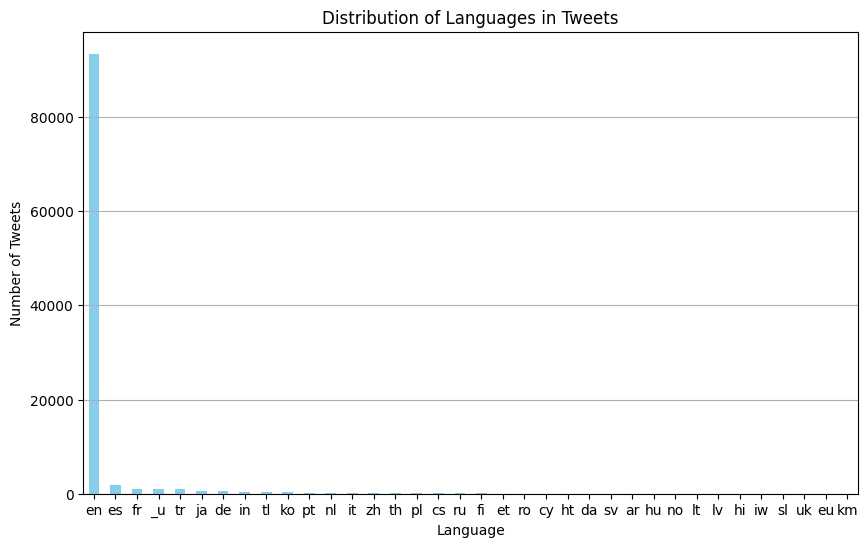

In [78]:
# Count the occurrences of each language
lang_counts = df['Lang'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
lang_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Languages in Tweets')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

#### In our `Lang` column, we have text in other languages too apart from english. We need to translate all the text into english for our sentiment analysis. 

In [79]:
#!pip install transformers

In [80]:
#!pip install torch

In [81]:
#!pip install sacremoses

In [82]:
df.head()

,Gender,Country,Hour,Day,Weekday,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,Lang,text,clean_text,translated_text
0,Unknown,Albania,7,12,Friday,True,339.0,127.0,0.0,44.0,0.0,en,"""RT @AdrianRusso82: Our Innovation Lab is offi...",our innovation lab officially open click learn...,our innovation lab officially open click learn...
1,Male,Albania,11,7,Thursday,False,87.0,0.0,0.0,22.0,0.0,en,Now Open AWS Asia Pacific (Seoul) Region via ...,now open aws asia pacific seoul region via are...,now open aws asia pacific seoul region via are...
2,Male,Albania,6,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,A Beginner's Guide to Scaling to 11 Million+ U...,a beginners guide scaling million users amazon...,a beginners guide scaling million users amazon...
3,Male,Albania,10,12,Tuesday,False,87.0,0.0,0.0,22.0,0.0,en,Bridging AWS and Azure environments via VPN vi...,bridging aws azure environments via vpn via ar...,bridging aws azure environments via vpn via ar...
4,Male,Albania,9,21,Thursday,False,85.0,0.0,0.0,21.0,0.0,en,ELK on AWS ElasticSearch Service + ElasticBean...,elk aws elasticsearch service elasticbeanstalk...,elk aws elasticsearch service elasticbeanstalk...


In [83]:
import logging
from googletrans import Translator, LANGUAGES
# Initialize the translator
translator = Translator()

# Initialize the translator
translator = Translator()

# Set up logging configuration
logging.basicConfig(filename='translation_errors.log', level=logging.ERROR, 
                    format='%(asctime)s:%(levelname)s:%(message)s')

# Function to translate non-English tweets
def translate_to_english(row):
    lang = row['Lang']
    if lang != 'en' and lang in LANGUAGES:
        try:
            translated = translator.translate(row['clean_text'], src=lang, dest='en')
            return translated.text
        except Exception as e:
            logging.error(f"Error translating row {row.name}: {lang}")
            return row['clean_text']
    elif lang != 'en' and lang not in LANGUAGES:
        logging.error(f"Invalid language code for row {row.name}: {lang}")
        return row['clean_text']
    return row['clean_text']

# Apply the translation function to the DataFrame
df['translated_text'] = df.apply(translate_to_english, axis=1)

# Print the translated DataFrame
print(df)

         Gender   Country  Hour  Day    Weekday  IsReshare   Reach  \
0       Unknown   Albania     7   12     Friday       True   339.0   
1          Male   Albania    11    7   Thursday      False    87.0   
2          Male   Albania     6   12    Tuesday      False    87.0   
3          Male   Albania    10   12    Tuesday      False    87.0   
4          Male   Albania     9   21   Thursday      False    85.0   
...         ...       ...   ...  ...        ...        ...     ...   
102057     Male  Zimbabwe    10    7     Sunday       True  1203.0   
102058  Unknown  Zimbabwe     5   12    Tuesday       True   976.0   
102059  Unknown  Zimbabwe     0   15    Tuesday      False  4876.0   
102060   Unisex  Zimbabwe     8    2  Wednesday       True   188.0   
102061  Unknown  Zimbabwe    12   21     Sunday       True   199.0   

        RetweetCount  Likes  Klout  Sentiment Lang  \
0              127.0    0.0   44.0        0.0   en   
1                0.0    0.0   22.0        0.0   en 

In [84]:
df['translated_text']

0         our innovation lab officially open click learn...
1         now open aws asia pacific seoul region via are...
2         a beginners guide scaling million users amazon...
3         bridging aws azure environments via vpn via ar...
4         elk aws elasticsearch service elasticbeanstalk...
                                ...                        
102057    does anyone good workflow using aws data scien...
102058    aws csa associate professional training availa...
102059    curious change opinion aws efficient dropbox r...
102060    new aws startup blog what startups should know...
102061    top paying it certifications in aws certified ...
Name: translated_text, Length: 101917, dtype: object

### Check valid words in translated_text

In [85]:
# Download and load the NLTK words corpus

english_words = set(words.words())

# Load lists
english_words = set(words.words())
stop_words = set(stopwords.words('english'))

# Function to filter out non-English words and stop words
def filter_valid_words(text):
    word_list = text.split()
    return [word for word in word_list if word.lower() in english_words and word.lower() not in stop_words]

# Apply the filter to 'translated_text' column
df['valid_words'] = df['translated_text'].apply(lambda x: filter_valid_words(x))

# Display the resulting DataFrame
print(df)

         Gender   Country  Hour  Day    Weekday  IsReshare   Reach  \
0       Unknown   Albania     7   12     Friday       True   339.0   
1          Male   Albania    11    7   Thursday      False    87.0   
2          Male   Albania     6   12    Tuesday      False    87.0   
3          Male   Albania    10   12    Tuesday      False    87.0   
4          Male   Albania     9   21   Thursday      False    85.0   
...         ...       ...   ...  ...        ...        ...     ...   
102057     Male  Zimbabwe    10    7     Sunday       True  1203.0   
102058  Unknown  Zimbabwe     5   12    Tuesday       True   976.0   
102059  Unknown  Zimbabwe     0   15    Tuesday      False  4876.0   
102060   Unisex  Zimbabwe     8    2  Wednesday       True   188.0   
102061  Unknown  Zimbabwe    12   21     Sunday       True   199.0   

        RetweetCount  Likes  Klout  Sentiment Lang  \
0              127.0    0.0   44.0        0.0   en   
1                0.0    0.0   22.0        0.0   en 

In [86]:
df.to_csv("cleaned_translation_data_1.csv")

In [91]:
df[['text','translated_text', 'valid_words', 'Sentiment']].head(10)

,text,translated_text,valid_words,Sentiment
0,"""RT @AdrianRusso82: Our Innovation Lab is offi...",our innovation lab officially open click learn...,"[innovation, lab, officially, open, click, lea...",0.0
1,Now Open AWS Asia Pacific (Seoul) Region via ...,now open aws asia pacific seoul region via are...,"[open, pacific, region, via]",0.0
2,A Beginner's Guide to Scaling to 11 Million+ U...,a beginners guide scaling million users amazon...,"[guide, scaling, million, via]",0.0
3,Bridging AWS and Azure environments via VPN vi...,bridging aws azure environments via vpn via ar...,"[bridging, azure, via, via]",0.0
4,ELK on AWS ElasticSearch Service + ElasticBean...,elk aws elasticsearch service elasticbeanstalk...,"[elk, service, via]",0.0
5,10 Lessons from 10 Years of Amazon Web Service...,lessons years amazon web services via aresysadmin,"[web, via]",0.0
6,How powerful are the burstable aws t2 instance...,how powerful burstable aws t instances via are...,"[powerful, via]",2.0
7,RT @pzerger: Microsoft and Google Lead in Clou...,microsoft google lead cloud growth aws rules o...,"[lead, cloud, growth, overall, azure]",0.0
8,RT @awscloud: How to deploy an SSL certificate...,how deploy ssl certificate aws certificate man...,"[deploy, certificate, certificate, manager, lo...",0.0
9,Too bad #Facebook: Host #Parse on #AWS #Heroku...,too bad facebook host parse a w s heroku mongo d,"[bad, host, parse, w]",-3.0
